# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [17]:
import pandas as pd
from __future__ import print_function, division
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('human_body_temperature.csv')
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

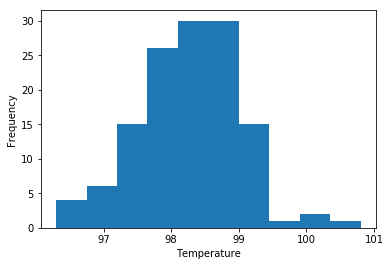

In [20]:
#Question 1
#By plotting, it does not look like the distribution is normal


df.temperature.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Temperature')

#Check for normalcy using p-test


import scipy.stats as stats
x=df.temperature
stats.normaltest(x)

#Since p value is higher than selected confidence interval, we cannot reject the null hypothesis. That means that the distribution is normal. 

In [21]:
#Question 2
df.temperature.count()

#This is a large enough sample size for Central Limit Theorem to apply. 30 and above is good. 
#Sample is less than 10% of human population. Randomly selected, so must be independent



130

In [24]:
#Question 3
# I would use a one sample z test because we are not checking the difference, but the aboslute value
#The null hypothesis is that the mean is equal to 98.6
#The alternative hypothesis is that the mean is not equal to 98.6
#The confidence interval we are using (or the threshold) is 0.05

from statsmodels.stats.weightstats import ztest
z= ztest(df.temperature,value=98.6)

#since the p value is much smaller than the alpha value, we can reject the null and assume that the population mean is not equal to 98.6
#We would use the z statistic because we know the std dev

#Using t test
t = stats.ttest_1samp(df.temperature,98.6)
#the result is still the same



Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [31]:
#Question 4
a= df.temperature

def confIntMean(a, conf=0.95):
    mean, sem, m = np.mean(a), stats.sem(a), stats.t.ppf((1+conf)/2., len(a)-1)
    return mean - m*sem, mean + m*sem

confIntMean(a,conf=0.95)

#Anything outside these bounds is abnormal

(98.122002905608042, 98.376458632853513)

In [33]:
#Question 5

#I would use a two sample z test since we want to determinen a signficance in difference

female_temps = np.array(df.temperature[df.gender=='F']) 
male_temps = np.array(df.temperature[df.gender=='M'])
len(female_temps)
len(male_temps)
stats.ttest_ind(female_temps,male_temps)
#Since p value is less than 0.05, we can reject null hypothesis


Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)